# Cluster analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

### Create a Simulated Data for Illustration

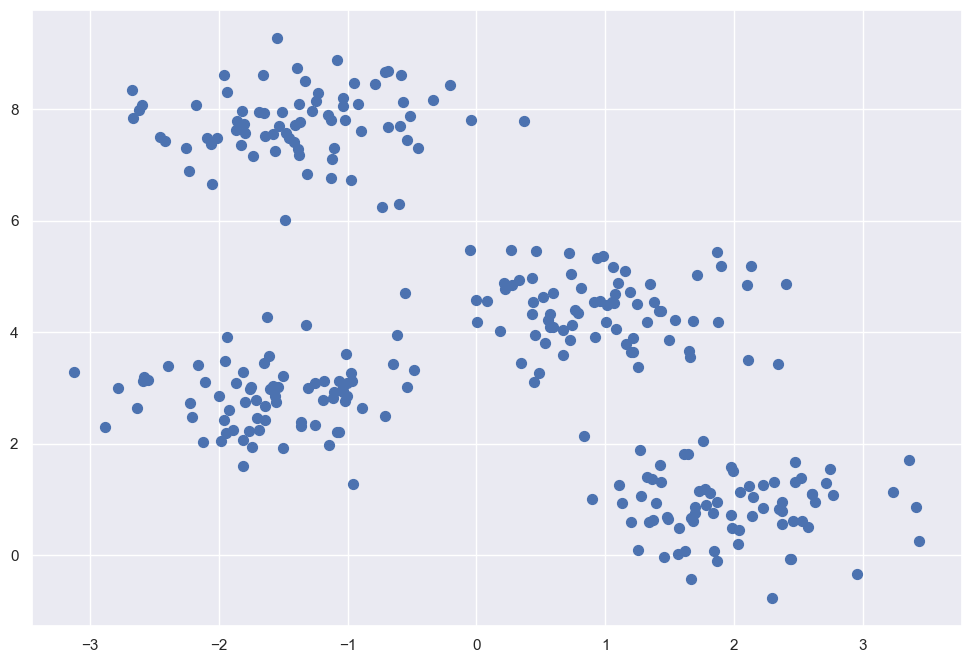

In [24]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=50);

### DBSCAN

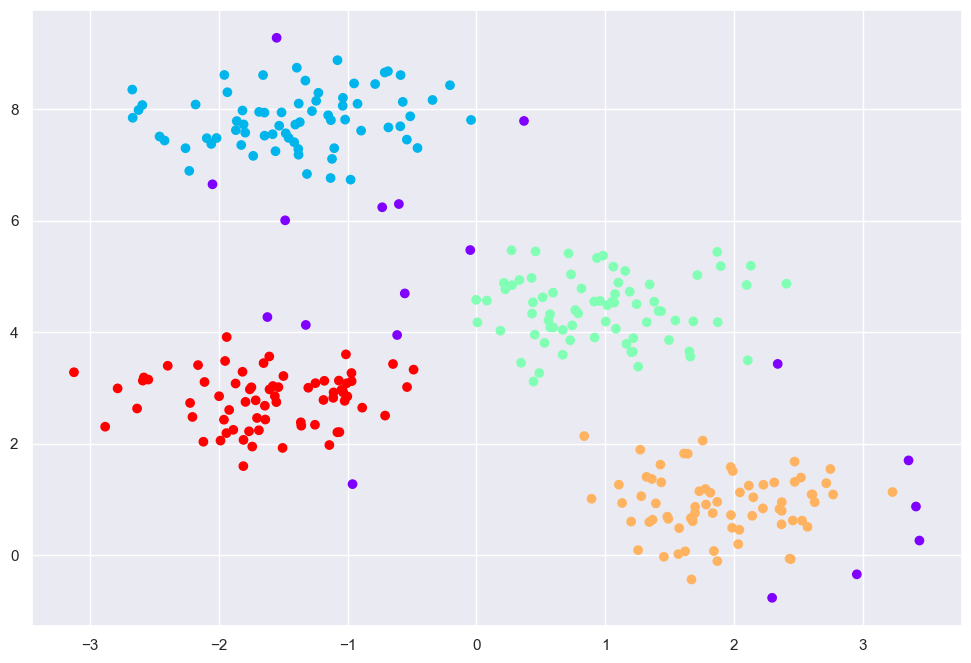

In [7]:
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=0.50, min_samples=5)

# fit model and predict clusters
yhat = model.fit_predict(X)

# create scatter plot for samples from each cluster
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap='rainbow')
plt.show()

### K-Means

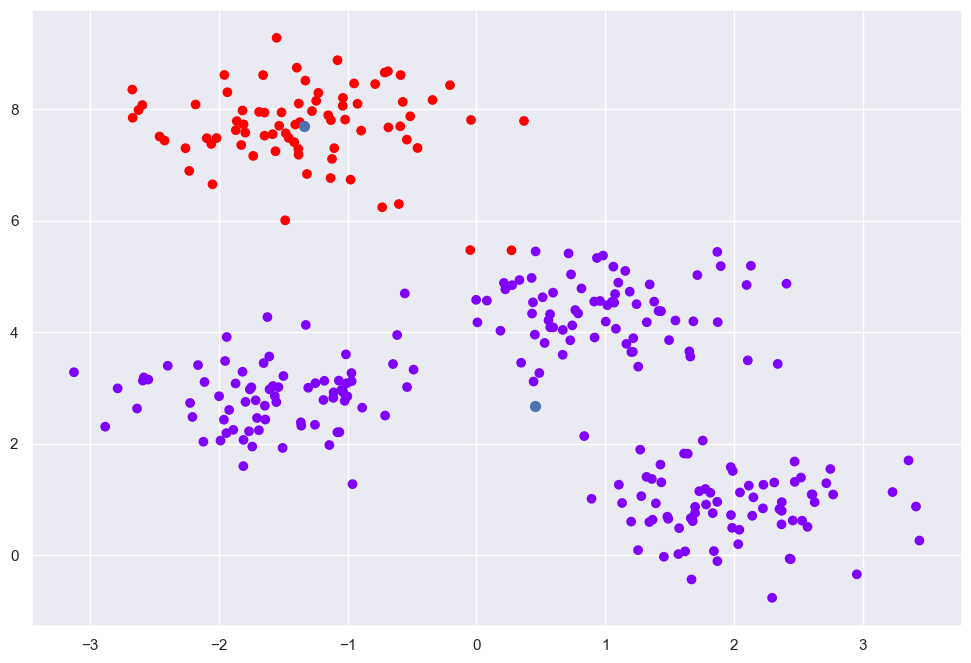

In [18]:
from sklearn.cluster import KMeans# define the model

model = KMeans(n_clusters=2)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# create scatter plot for samples from each cluster
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50)
plt.show()

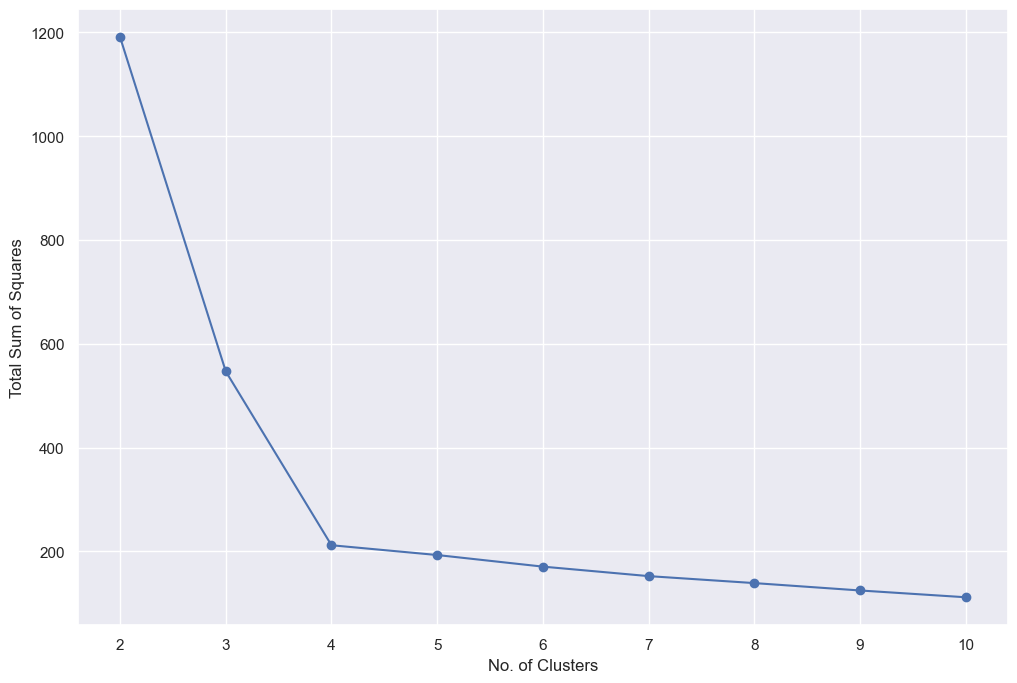

In [15]:
within_ss = []
for K in range(2,11):
    model = KMeans(n_clusters=K)

    # fit the model
    model.fit(X)
    within_ss.append(model.inertia_)
    
# create scatter plot for samples from each cluster
plt.figure(figsize=(12,8))
plt.plot(range(2,11), within_ss, '-o')
plt.ylabel('Total Sum of Squares')
plt.xlabel('No. of Clusters')
plt.show()


### Agglomerative Clustering



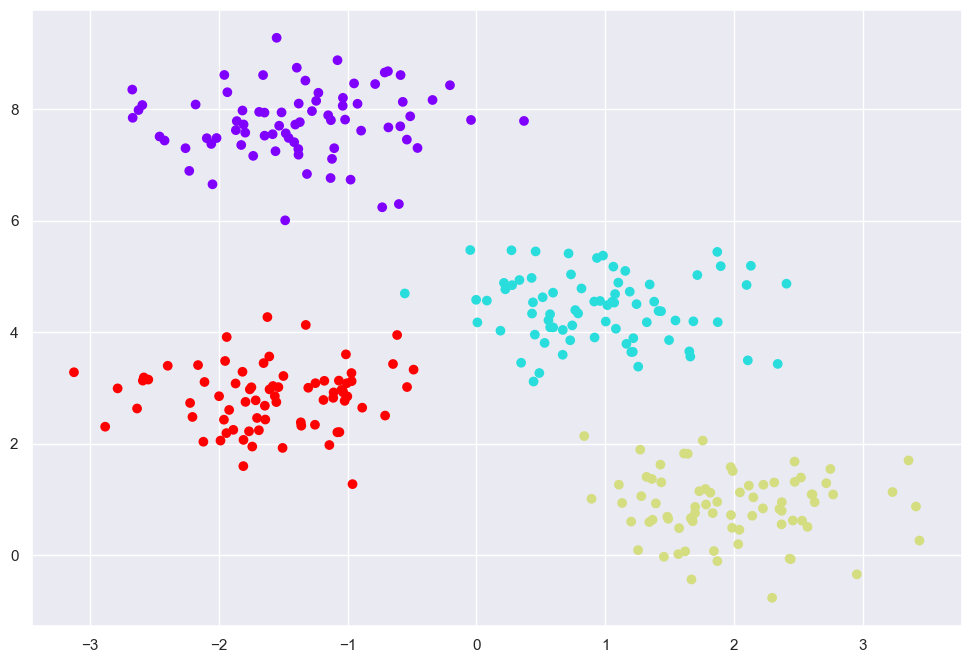

In [22]:
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
# fit model and predict clusters
yhat = model.fit_predict(X)

# create scatter plot for samples from each cluster
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap='rainbow')
plt.show()

### Clustering of Strings

In [ ]:
#!pip install python-Levenshtein

In [ ]:
#!pip install scikit-learn-extra


### TF-IDF Vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
words = ['apple', 'Doppler', 'applaud', 'append', 'barker', 
         'baker', 'bismark', 'park', 'stake', 'steak', 'teak', 'sleek']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(words)
print(X.toarray())

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
words = ['apple', 'Doppler', 'applaud', 'append', 'barker', 
         'baker', 'bismark', 'park', 'stake', 'steak', 'teak', 'sleek']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(words)

model = KMeans(n_clusters=5)

model.fit(X)

yhat = model.predict(X)

cluster = dict()
for word, label in zip(words, yhat):
    cluster.setdefault(label, []).append(word)
for label, grp in cluster.items():
    print(grp)

['apple', 'Doppler', 'applaud', 'append', 'barker', 'park', 'stake', 'sleek']
['baker']
['bismark']
['steak']
['teak']


### Using Levenshtein Distance with KMedoids Model

In [32]:
from Levenshtein import distance as levenshtein_distance

words = ['apple', 'Doppler', 'applaud', 'append', 'barker', 
         'baker', 'bismark', 'park', 'stake', 'steak', 'teak', 'sleek']


dist = np.zeros((len(words),len(words)))
for i in range(1, len(words)):
    for j in range(0, i):
        dist[i,j] = levenshtein_distance(words[i], words[j]) 
        dist[j,i] = dist[i,j]

from sklearn_extra.cluster import KMedoids

#K-Medoids model
model = KMedoids(n_clusters=3, metric='precomputed')
#model = DBSCAN(eps=0.30, min_samples=10, metric='precomputed')

#fit the model
model.fit_predict(dist)
#predict
yhat = model.predict(dist)

#Check
cluster = dict()
for word, label in zip(words, yhat):
    cluster.setdefault(label, []).append(word)
for label, grp in cluster.items():
    print(grp)

['apple', 'Doppler', 'applaud', 'append', 'park']
['barker', 'baker', 'bismark']
['stake', 'steak', 'teak', 'sleek']


### Plot a Dendrogram for Agglomerative Clustering

In [34]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    


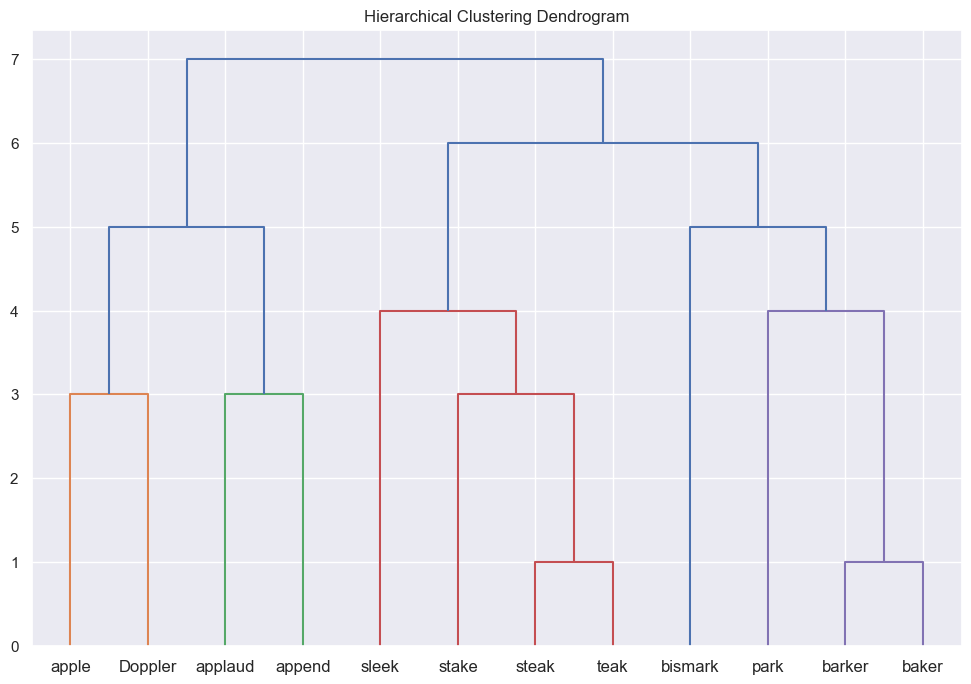

In [43]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed', linkage='complete')

model = model.fit(dist)
plt.figure(figsize=(12,8))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level",  labels=words)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()